RAG tutorial

In [ ]:
# %pip install --quiet --upgrade langchain-text-splitters langchain-community langgraph
# %pip install python-dotenv
# %pip install -qU langchain-ollama
# %pip install -qU langchain-core
# %pip install beautifulsoup4
# %pip install langchainhub
# %pip install langchain-community
# %pip install langchain-text-splitters
# %pip install langgraph
# %pip install typing-extensions
# %pip install -U langchain-chroma
# %pip install chromadb langchain langchain-community
# %%capture --no-stderr
# %pip install --upgrade --quiet langgraph langchain-community beautifulsoup4



  Using cached langchain_chroma-0.2.3-py3-none-any.whl.metadata (1.1 kB)
  Using cached chromadb-0.6.3-py3-none-any.whl.metadata (6.8 kB)
  Using cached build-1.2.2.post1-py3-none-any.whl.metadata (6.5 kB)
  Using cached chroma_hnswlib-0.7.6.tar.gz (32 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached onnxruntime-1.21.1-cp313-cp313-win_amd64.whl.metadata (4.9 kB)
  Using cached opentelemetry_instrumentation_fastapi-0.53b1-py3-none-any.whl.metadata (2.2 kB)
  Using cached pypika-0.48.9-py2.py3-none-any.whl
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached bcrypt-4.3.0-cp39-abi3-win_amd64.whl.metadata (10 kB)
  Using cached typer-0.15.3-py3-none-any.whl.

  error: subprocess-exited-with-error
  
  × Building wheel for chroma-hnswlib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [5 lines of output]
      running bdist_wheel
      running build
      running build_ext
      building 'hnswlib' extension
      error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for chroma-hnswlib

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Failed to build installable wheels for some pyproject.toml based projects (chroma-hnswlib)


  Using cached build-1.2.2.post1-py3-none-any.whl.metadata (6.5 kB)
  Using cached fastapi-0.115.9-py3-none-any.whl.metadata (27 kB)
  Using cached onnxruntime-1.21.1-cp313-cp313-win_amd64.whl.metadata (4.9 kB)
  Using cached opentelemetry_instrumentation_fastapi-0.53b1-py3-none-any.whl.metadata (2.2 kB)
  Using cached pypika-0.48.9-py2.py3-none-any.whl
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached bcrypt-4.3.0-cp39-abi3-win_amd64.whl.metadata (10 kB)
  Using cached typer-0.15.3-py3-none-any.whl.metadata (15 kB)
  Using cached kubernetes-32.0.1-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached mmh3-5.1.0-cp313-cp313-win_amd64.whl.metadata (16 kB)
  Using cached rich-14.0.0-py3-none-any.whl.metadata (18 kB)
  Using cached pyproject_hooks-1.2.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl.metadata (11 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl.metadata (7.5 kB)
  Using cached durati


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import getpass
import os

os.environ["LANGSMITH_TRACING"] = "true"
# os.environ["LANGSMITH_API_KEY"] = getpass.getpass()

Chat Model

In [1]:
import getpass
import os

if not os.environ.get("ANTHROPIC_API_KEY"):
  os.environ["ANTHROPIC_API_KEY"] = getpass.getpass("Enter API key for Anthropic: ")

from langchain.chat_models import init_chat_model

llm = init_chat_model("claude-3-5-sonnet-latest", model_provider="anthropic")

Embedding Model

In [2]:
from langchain_ollama import OllamaEmbeddings

embeddings = OllamaEmbeddings(model="llama3")

Vector Store

In [3]:
from langchain_community.vectorstores import Chroma
# from langchain_chroma import Chroma

vector_store = Chroma(
    collection_name="example_collection",
    embedding_function=embeddings,
    persist_directory="./chroma_langchain_db",  # Where to save data locally, remove if not necessary
)

C:\Users\Luiz\AppData\Local\Temp\ipykernel_5996\2094244361.py:4: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vector_store = Chroma(


App LLM Powered

In [4]:
import bs4
from langchain_community.document_loaders import WebBaseLoader

# Only keep post title, headers, and content from the full HTML.
bs4_strainer = bs4.SoupStrainer(class_=("post-title", "post-header", "post-content"))
loader = WebBaseLoader(
    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
    bs_kwargs={"parse_only": bs4_strainer},
)
docs = loader.load() # list of documents

assert len(docs) == 1
print(f"Total characters: {len(docs[0].page_content)}")

USER_AGENT environment variable not set, consider setting it to identify your requests.


Total characters: 43130


In [5]:
print(docs[0].page_content[:500])



      LLM Powered Autonomous Agents
    
Date: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng


Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.
Agent System Overview#
In


In [6]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,  # chunk size (characters)
    chunk_overlap=200,  # chunk overlap (characters)
    add_start_index=True,  # track index in original document
)
all_splits = text_splitter.split_documents(docs)

print(f"Split blog post into {len(all_splits)} sub-documents.")

Split blog post into 66 sub-documents.


LangChain

In [ ]:
# Index chunks
_ = vector_store.add_documents(documents=all_splits)

tool calling -> https://python.langchain.com/docs/concepts/tool_calling/

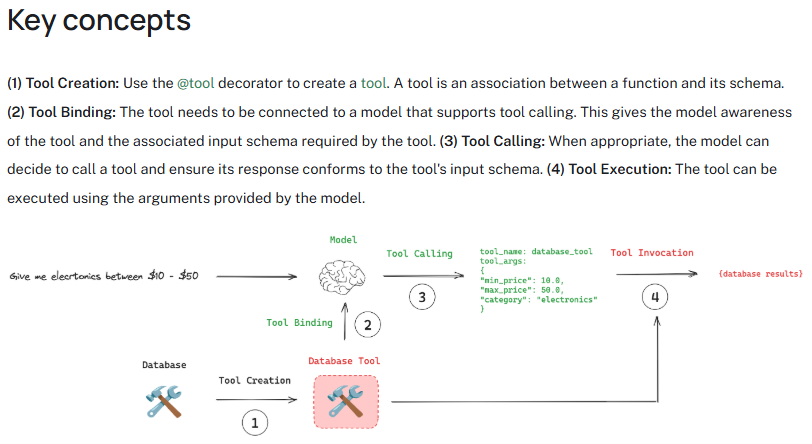

In [7]:
"""
Retrieve information related to a query.
"""
from langchain_core.tools import tool


@tool(response_format="content_and_artifact")
def retrieve(query: str):
    """Retrieve information related to a query."""
    retrieved_docs = vector_store.similarity_search(query, k=2)
    serialized = "\n\n".join(
        (f"Source: {doc.metadata}\n" f"Content: {doc.page_content}")
        for doc in retrieved_docs
    )
    return serialized, retrieved_docs

In [9]:
from langgraph.graph import MessagesState, StateGraph
graph_builder = StateGraph(MessagesState)

In [10]:
from langchain_core.messages import SystemMessage
from langgraph.prebuilt import ToolNode

"""
Generate AIMessage that may include a tool-call to be sent, execute the retrieval, and generate a response using the retrieved content.
"""

# Step 1: Generate an AIMessage that may include a tool-call to be sent.
def query_or_respond(state: MessagesState):
    """Generate tool call for retrieval or respond."""
    llm_with_tools = llm.bind_tools([retrieve])
    response = llm_with_tools.invoke(state["messages"])
    # MessagesState appends messages to state instead of overwriting
    return {"messages": [response]}


# Step 2: Execute the retrieval.
# ToolNode acts as a bridge between the LLM’s decision and 
# the actual execution of the retrieval function.
tools = ToolNode([retrieve])


# Step 3: Generate a response using the retrieved content.
def generate(state: MessagesState):
    """Generate answer."""
    # Get generated ToolMessages
    recent_tool_messages = []
    for message in reversed(state["messages"]):
        if message.type == "tool":
            recent_tool_messages.append(message)
        else:
            break
    tool_messages = recent_tool_messages[::-1]

    # Format into prompt
    docs_content = "\n\n".join(doc.content for doc in tool_messages)
    system_message_content = (
        "You are an assistant for question-answering tasks. "
        "Use the following pieces of retrieved context to answer "
        "the question. If you don't know the answer, say that you "
        "don't know. Use three sentences maximum and keep the "
        "answer concise."
        "\n\n"
        f"{docs_content}"
    )
    conversation_messages = [
        message
        for message in state["messages"]
        if message.type in ("human", "system")
        or (message.type == "ai" and not message.tool_calls)
    ]
    prompt = [SystemMessage(system_message_content)] + conversation_messages

    # Run
    response = llm.invoke(prompt)
    return {"messages": [response]}

In [ ]:
"""
This code defines a simple graph for generating text based on user input. The graph
consists of three nodes: `query_or_respond`, `tools`, and `generate`. The `query_or_respond`
node is the entry point and decides whether to call a tool or generate text directly. The
`tools` node calls the tool and the `generate` node generates text based on the output of
the tool. The graph is then compiled and the resulting graph object is stored in the
`graph` variable.
"""

from langgraph.graph import END
from langgraph.prebuilt import ToolNode, tools_condition

graph_builder.add_node(query_or_respond)
graph_builder.add_node(tools)
graph_builder.add_node(generate)

graph_builder.set_entry_point("query_or_respond")
graph_builder.add_conditional_edges(
    "query_or_respond",
    tools_condition,
    {END: END, "tools": "tools"},
)
graph_builder.add_edge("tools", "generate")
graph_builder.add_edge("generate", END)

graph = graph_builder.compile()

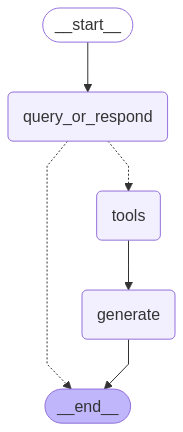

In [35]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [36]:
input_message = "Hello"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Hello
================================== Ai Message ==================================

Hello! I'm here to help you retrieve information using the available tools. What would you like to know about?


In [37]:
input_message = "What is Task Decomposition?"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

What is Task Decomposition?
================================== Ai Message ==================================

[{'text': 'Let me retrieve information about Task Decomposition.', 'type': 'text'}, {'id': 'toolu_011P5wcJMB8swxNDZoeSxqD1', 'input': {'query': 'What is task decomposition? Definition and explanation of task decomposition'}, 'name': 'retrieve', 'type': 'tool_use'}]
Tool Calls:
  retrieve (toolu_011P5wcJMB8swxNDZoeSxqD1)
 Call ID: toolu_011P5wcJMB8swxNDZoeSxqD1
  Args:
    query: What is task decomposition? Definition and explanation of task decomposition
================================= Tool Message =================================
Name: retrieve

Source: {'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 5929}
Content: Fig. 4. Experiments on AlfWorld Env and HotpotQA. Hallucination is a more common failure than inefficient planning in AlfWorld. (Image source: Shin

In [20]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

# Specify an ID for the thread
config = {"configurable": {"thread_id": "abc123"}}

In [38]:
input_message = "What is Task Decomposition?"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

What is Task Decomposition?
================================== Ai Message ==================================

[{'text': 'Let me retrieve information about Task Decomposition.', 'type': 'text'}, {'id': 'toolu_01RyPcSQXN9sXarxZ4Nqqpmc', 'input': {'query': 'What is task decomposition? Definition, explanation, and key concepts'}, 'name': 'retrieve', 'type': 'tool_use'}]
Tool Calls:
  retrieve (toolu_01RyPcSQXN9sXarxZ4Nqqpmc)
 Call ID: toolu_01RyPcSQXN9sXarxZ4Nqqpmc
  Args:
    query: What is task decomposition? Definition, explanation, and key concepts
================================= Tool Message =================================
Name: retrieve

Source: {'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 5929}
Content: Fig. 4. Experiments on AlfWorld Env and HotpotQA. Hallucination is a more common failure than inefficient planning in AlfWorld. (Image source: Shinn & Labash, 20

In [39]:
input_message = "Can you look up some common ways of doing it?"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Can you look up some common ways of doing it?
================================== Ai Message ==================================

I apologize, but your question is very vague. Could you please specify what "it" refers to? What specific topic, task, or process would you like to learn more about? 

Once you provide more details about what you're interested in, I can help retrieve relevant information about common methods or approaches for that particular subject.

For example, are you looking for:
- Common ways of cooking something specific?
- Common ways of solving a particular problem?
- Common ways of performing a specific task?
- Common ways of learning a particular skill?

Please provide more context so I can give you helpful and relevant information.
